In [1]:
from HTML import config as Config
from HTML.dataset import *
from HTML.config import ratio, nominal, ordinal, meaningless
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_train = pd.read_csv(Config.train_path)
x_train.head()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03


In [28]:
x_train.shape

(91527, 33)

In [3]:
x_train.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

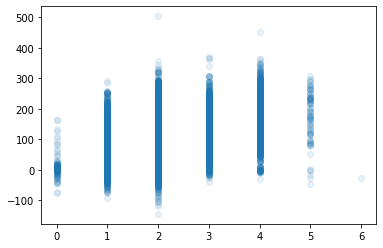

In [4]:
tmp = x_train[x_train['adr'] < 5000]
tmp = tmp[(tmp['adults']+tmp['children']+tmp['babies']) < 10]
plt.scatter(tmp['adults']+tmp['children']+tmp['babies'], tmp['adr'], alpha=.1)

In [5]:
x_train[x_train['adr'] > 5000]

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
31980,31980,City Hotel,1,35,2016,March,13,25,0,1,...,Non Refund,12.0,NaN,0,Transient,5399.424061,0,0,Canceled,2016-02-19


In [6]:
from HTML.preprocessing import preprocessing
x_train = preprocessing(x_train)
x_train.head()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,None,None,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6,None,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6,None,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6,None,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6,None,0,Transient,49.411647,0,0,Check-Out,2015-07-03


In [7]:
from sklearn.feature_selection import chi2

In [36]:
x_train.head()[{'reservation_status', 'reservation_status_date', 'is_canceled'}]

,reservation_status_date,is_canceled,reservation_status
0,2015-07-01,0,Check-Out
1,2015-07-03,0,Check-Out
2,2015-07-03,0,Check-Out
3,2015-07-03,0,Check-Out
4,2015-07-03,0,Check-Out


In [37]:
dummies = pd.get_dummies(
        data=x_train[set(x_train.columns) - {'reservation_status', 'reservation_status_date', 'is_canceled'}],
        columns=set(nominal+ordinal) - {'reservation_status', 'reservation_status_date', 'is_canceled'},
        drop_first=True,
        dummy_na=True)
dummies = dummies[sorted(set(dummies.columns) - {'index', 'ID'} - set(meaningless))]

In [38]:
x = dummies[sorted(set(dummies.columns) - {'adr'})].to_numpy()
y = dummies['adr'].to_numpy()

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [40]:
# x_new = SelectKBest(f_regression, k=3).fit_transform(x, y)

In [41]:
x.shape

(91527, 954)

In [42]:
# x_new.shape

In [43]:
# from sklearn.preprocessing import Normalizer
# transformer = Normalizer()
# x_norm = transformer.fit_transform(x)

In [7]:
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [11]:
dummies_sm = pd.get_dummies(
        data=x_train[x_train['adr'] < 5000][set(x_train.columns) - {'adr', 'reservation_status', 'reservation_status_date', 'is_canceled'}],
        columns=set(nominal+ordinal) - {'adr', 'reservation_status', 'reservation_status_date', 'is_canceled'},
        drop_first=True,
        dummy_na=True)
dummies_sm = dummies_sm[sorted(set(dummies_sm.columns) - {'index', 'ID'} - set(meaningless))]
x_sm = dummies_sm[sorted(set(dummies_sm.columns))].to_numpy()
y_sm = x_train[x_train['adr'] < 5000]['adr'].to_numpy()

In [12]:
x_sm.shape

(91526, 954)

In [15]:
y_sm.shape

(91526,)

In [49]:
# s = []
# for i in [0,1,3,5,10]:
#     regr = XGBRegressor(
#         n_estimators=100,
#         learning_rate=.3,
#         max_depth=6,
#         subsample=1,
#         n_jobs=6,
#         colsample_bytree=.7,
#         random_state=1126,
#         gamma=i
#     )
#     scores = cross_val_score(regr, x_sm, y_sm, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2)
#     s.append(scores)
#     print(np.mean(scores))

In [23]:
# plt.plot([0,1,3,5,10], np.mean(np.array(s),axis=1))

In [16]:
# regr = SVR()
# regr = ElasticNetCV(cv=5, random_state=0, n_jobs=-1)
# regr = RandomForestRegressor(n_jobs=-1)
# regr = SGDRegressor()
regr = XGBRegressor(
    n_estimators=100,
    learning_rate=.3,
    max_depth=6,
    subsample=1,
    n_jobs=6,
    colsample_bytree=.7,
    random_state=1126,
    gamma=10
)

In [17]:
regr

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.7, gamma=10, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=None, max_depth=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=6, num_parallel_tree=None,
             random_state=1126, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=1, tree_method=None,
             validate_parameters=None, verbosity=None)

In [18]:
regr.fit(x_sm, y_sm)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=1126,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
pred = regr.predict(x_sm)

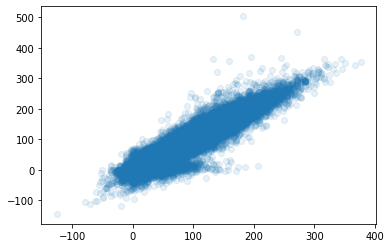

In [20]:
plt.scatter(pred, y_sm, alpha=.1)

In [21]:
scores = cross_val_score(regr, x_sm, y_sm, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  2.2min finished


In [22]:
scores

array([-1119.56334618,  -741.32711991,  -934.86387959,  -820.63505218,
        -507.03323542])

In [23]:
np.mean(scores)

-824.6845266545076

In [24]:
x_train['adr'].max()

5399.424061287761

In [25]:
x_train['adr'].min()

-144.70448560551358

In [26]:
x_train['adr'].mean()

84.64672331212972

In [27]:
np.mean(np.sqrt(-scores))

28.48537409862571